Liver Disease Prediction

In [3]:

import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

# Ignore Warnings
import warnings
warnings.filterwarnings("ignore")

from math import sqrt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

from sklearn.model_selection import GridSearchCV



from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

plt.style.use('ggplot')


In [5]:
df=pd.read_csv(r'datasets/Liver.csv',encoding='ISO-8859-1')
df.head()

,Age of the patient,Gender of the patient,Total Bilirubin,Direct Bilirubin,Alkphos Alkaline Phosphotase,Sgpt Alamine Aminotransferase,Sgot Aspartate Aminotransferase,Total Protiens,ALB Albumin,A/G Ratio Albumin and Globulin Ratio,Result
0,65.0,Female,0.7,0.1,187.0,16.0,18.0,6.8,3.3,0.90,1
1,62.0,Male,10.9,5.5,699.0,64.0,100.0,7.5,3.2,0.74,1
2,62.0,Male,7.3,4.1,490.0,60.0,68.0,7.0,3.3,0.89,1
3,58.0,Male,1.0,0.4,182.0,14.0,20.0,6.8,3.4,1.00,1
4,72.0,Male,3.9,2.0,195.0,27.0,59.0,7.3,2.4,0.40,1


In [6]:
column_rename_dict = {
    'Sgot Aspartate Aminotransferase': 'Aspartate_Aminotransferase'
}

df.rename(columns=column_rename_dict, inplace=True)
df.head()

,Age of the patient,Gender of the patient,Total Bilirubin,Direct Bilirubin,Alkphos Alkaline Phosphotase,Sgpt Alamine Aminotransferase,Aspartate_Aminotransferase,Total Protiens,ALB Albumin,A/G Ratio Albumin and Globulin Ratio,Result
0,65.0,Female,0.7,0.1,187.0,16.0,18.0,6.8,3.3,0.90,1
1,62.0,Male,10.9,5.5,699.0,64.0,100.0,7.5,3.2,0.74,1
2,62.0,Male,7.3,4.1,490.0,60.0,68.0,7.0,3.3,0.89,1
3,58.0,Male,1.0,0.4,182.0,14.0,20.0,6.8,3.4,1.00,1
4,72.0,Male,3.9,2.0,195.0,27.0,59.0,7.3,2.4,0.40,1


In [7]:
df.shape

(30691, 11)


Exploratory Data Analysis

In [8]:
df.isna().sum()

Age of the patient                        2
Gender of the patient                   902
Total Bilirubin                         648
Direct Bilirubin                        561
 Alkphos Alkaline Phosphotase           796
 Sgpt Alamine Aminotransferase          538
Aspartate_Aminotransferase              462
Total Protiens                          463
 ALB Albumin                            494
A/G Ratio Albumin and Globulin Ratio    559
Result                                    0
dtype: int64

In [159]:
df = df.dropna()
df.isna().sum()

Age of the patient                      0
Gender of the patient                   0
Total Bilirubin                         0
Direct Bilirubin                        0
 Alkphos Alkaline Phosphotase           0
 Sgpt Alamine Aminotransferase          0
Aspartate_Aminotransferase              0
Total Protiens                          0
 ALB Albumin                            0
A/G Ratio Albumin and Globulin Ratio    0
Result                                  0
dtype: int64

Distribution of Numerical Features

In [9]:
df.head()


,Age of the patient,Gender of the patient,Total Bilirubin,Direct Bilirubin,Alkphos Alkaline Phosphotase,Sgpt Alamine Aminotransferase,Aspartate_Aminotransferase,Total Protiens,ALB Albumin,A/G Ratio Albumin and Globulin Ratio,Result
0,65.0,Female,0.7,0.1,187.0,16.0,18.0,6.8,3.3,0.90,1
1,62.0,Male,10.9,5.5,699.0,64.0,100.0,7.5,3.2,0.74,1
2,62.0,Male,7.3,4.1,490.0,60.0,68.0,7.0,3.3,0.89,1
3,58.0,Male,1.0,0.4,182.0,14.0,20.0,6.8,3.4,1.00,1
4,72.0,Male,3.9,2.0,195.0,27.0,59.0,7.3,2.4,0.40,1


In [10]:
df.describe()

,Age of the patient,Total Bilirubin,Direct Bilirubin,Alkphos Alkaline Phosphotase,Sgpt Alamine Aminotransferase,Aspartate_Aminotransferase,Total Protiens,ALB Albumin,A/G Ratio Albumin and Globulin Ratio,Result
count,30689.000000,30043.000000,30130.000000,29895.000000,30153.000000,30229.000000,30228.000000,30197.000000,30132.000000,30691.000000
mean,44.107205,3.370319,1.528042,289.075364,81.488641,111.469979,6.480237,3.130142,0.943467,1.285882
std,15.981043,6.255522,2.869592,238.537589,182.158850,280.851078,1.081980,0.792281,0.323164,0.451841
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,32.000000,0.800000,0.200000,175.000000,23.000000,26.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,209.000000,35.000000,42.000000,6.600000,3.100000,0.900000,1.000000
75%,55.000000,2.700000,1.300000,298.000000,62.000000,88.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


In [11]:
## if score==negative, mark 0 ;else 1 
def partition(x):
    if x == 2:
        return 0
    return 1


df['Result'] = df['Result'].map(partition)

Number of patients that are male:  21986
Number of patients that are female:  7803


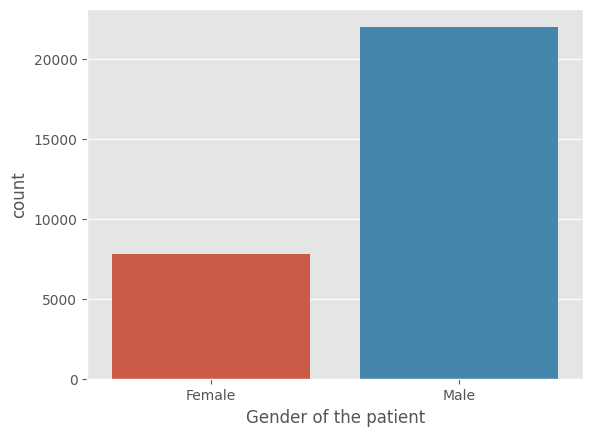

In [12]:
sns.countplot(data=df, x = 'Gender of the patient', label='Count')

M, F = df['Gender of the patient'].value_counts()
print('Number of patients that are male: ',M)
print('Number of patients that are female: ',F)

In [13]:
## if score==negative, mark 0 ;else 1 
def partition(x):
    if x =='Male':
        return 0
    return 1

df['Gender of the patient'] = df['Gender of the patient'].map(partition)

In [14]:
df.head()

,Age of the patient,Gender of the patient,Total Bilirubin,Direct Bilirubin,Alkphos Alkaline Phosphotase,Sgpt Alamine Aminotransferase,Aspartate_Aminotransferase,Total Protiens,ALB Albumin,A/G Ratio Albumin and Globulin Ratio,Result
0,65.0,1,0.7,0.1,187.0,16.0,18.0,6.8,3.3,0.90,1
1,62.0,0,10.9,5.5,699.0,64.0,100.0,7.5,3.2,0.74,1
2,62.0,0,7.3,4.1,490.0,60.0,68.0,7.0,3.3,0.89,1
3,58.0,0,1.0,0.4,182.0,14.0,20.0,6.8,3.4,1.00,1
4,72.0,0,3.9,2.0,195.0,27.0,59.0,7.3,2.4,0.40,1


<Axes: >

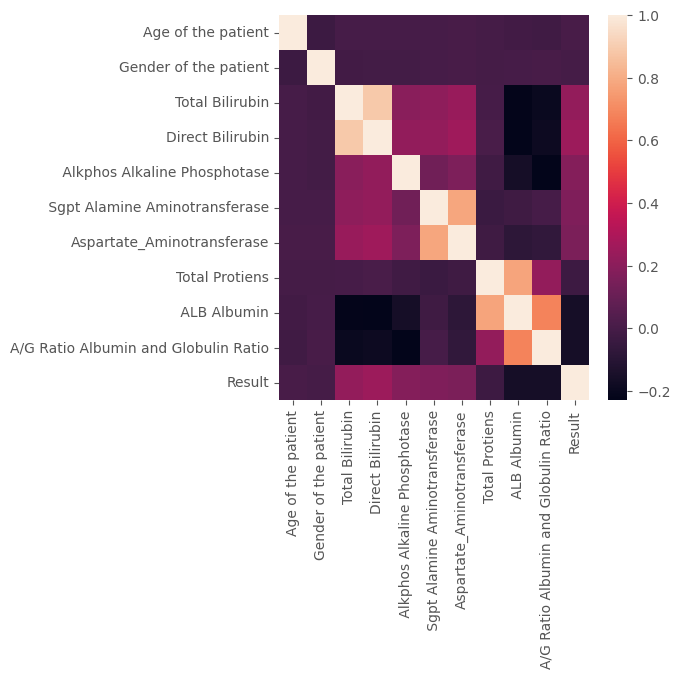

In [15]:
plt.figure(figsize=(5,5))
sns.heatmap(df.corr())

Data Cleaning

In [16]:
df = df.drop_duplicates()
print( df.shape )

(19231, 11)


Removing Outliers

<Axes: >

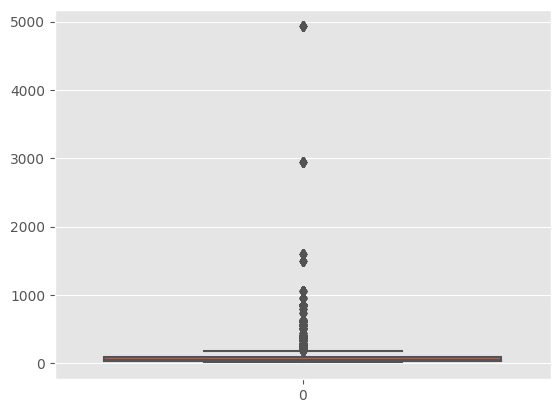

In [17]:
sns.boxplot(df.Aspartate_Aminotransferase)

In [18]:
df.Aspartate_Aminotransferase.sort_values(ascending=False).head()

21155    4929.0
12156    4929.0
25812    4929.0
135      4929.0
22904    4929.0
Name: Aspartate_Aminotransferase, dtype: float64

In [19]:
df = df[df.Aspartate_Aminotransferase <=3000 ]
df.shape

(18811, 11)

<Axes: >

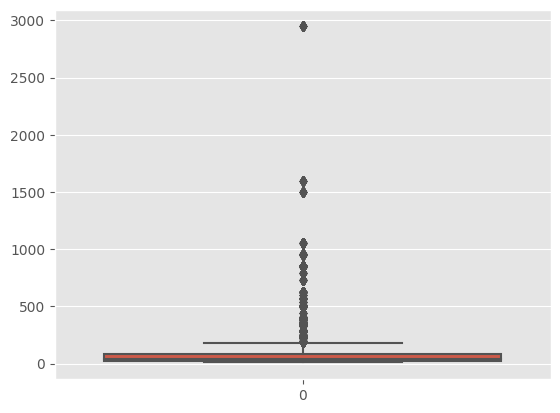

In [20]:
sns.boxplot(df.Aspartate_Aminotransferase)

In [21]:
df.Aspartate_Aminotransferase.sort_values(ascending=False).head()

23105    2946.0
22303    2946.0
700      2946.0
3032     2946.0
4781     2946.0
Name: Aspartate_Aminotransferase, dtype: float64

In [23]:
df = df[df.Aspartate_Aminotransferase <=2500 ]
df.shape

(18780, 11)

In [24]:
df.isnull().values.any()

True

In [25]:
df=df.dropna(how='any')  
df.shape

(16646, 11)

In [177]:
df.head()

,Age of the patient,Gender of the patient,Total Bilirubin,Direct Bilirubin,Alkphos Alkaline Phosphotase,Sgpt Alamine Aminotransferase,Aspartate_Aminotransferase,Total Protiens,ALB Albumin,A/G Ratio Albumin and Globulin Ratio,Result
0,65.0,1,0.7,0.1,187.0,16.0,18.0,6.8,3.3,0.90,1
1,62.0,0,10.9,5.5,699.0,64.0,100.0,7.5,3.2,0.74,1
2,62.0,0,7.3,4.1,490.0,60.0,68.0,7.0,3.3,0.89,1
3,58.0,0,1.0,0.4,182.0,14.0,20.0,6.8,3.4,1.00,1
4,72.0,0,3.9,2.0,195.0,27.0,59.0,7.3,2.4,0.40,1


Machine Learning Models

Data Preparation

In [26]:
# Create separate object for target variable
y = df.Result

# Create separate object for input features
X = df.drop('Result', axis=1)
# Split X and y into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.3, 
                                                    random_state=0,
                                                    stratify=df.Result)
# Print number of observations in X_train, X_test, y_train, and y_test
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(11652, 10) (4994, 10) (11652,) (4994,)


Data standardization

In [27]:
train_mean = X_train.mean()
train_std = X_train.std()
## Standardize the train data set
X_train = (X_train - train_mean) / train_std
## Check for mean and std dev.
X_train.describe()

,Age of the patient,Gender of the patient,Total Bilirubin,Direct Bilirubin,Alkphos Alkaline Phosphotase,Sgpt Alamine Aminotransferase,Aspartate_Aminotransferase,Total Protiens,ALB Albumin,A/G Ratio Albumin and Globulin Ratio
count,1.165200e+04,1.165200e+04,1.165200e+04,1.165200e+04,1.165200e+04,1.165200e+04,1.165200e+04,1.165200e+04,1.165200e+04,1.165200e+04
mean,5.488229e-17,-1.170822e-16,6.585875e-17,-3.811270e-18,6.646855e-17,-7.927442e-18,-6.707836e-18,-3.878349e-16,7.177384e-16,-1.341567e-16
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-2.411910e+00,-6.854726e-01,-4.735625e-01,-4.908227e-01,-9.407511e-01,-4.195868e-01,-5.147102e-01,-3.441080e+00,-2.797885e+00,-1.984515e+00
25%,-7.154050e-01,-6.854726e-01,-4.093844e-01,-4.565254e-01,-4.741450e-01,-3.349314e-01,-4.218240e-01,-6.172441e-01,-6.667021e-01,-7.569735e-01
50%,7.225809e-02,-6.854726e-01,-3.772954e-01,-4.222282e-01,-3.324967e-01,-2.502760e-01,-3.289379e-01,1.114878e-01,-3.988356e-02,-8.182558e-02
75%,6.781528e-01,1.458722e+00,-1.205831e-01,-7.925572e-02,3.828853e-02,-8.747713e-02,-6.769560e-02,6.580367e-01,8.376624e-01,4.705682e-01
max,2.798784e+00,1.458722e+00,1.149565e+01,6.231438e+00,7.587309e+00,1.253920e+01,8.715850e+00,2.844233e+00,2.968845e+00,5.687621e+00


In [28]:
## Note: We use train_mean and train_std_dev to standardize test data set
X_test = (X_test - train_mean) / train_std
## Check for mean and std dev. - not exactly 0 and 1
X_test.describe()

,Age of the patient,Gender of the patient,Total Bilirubin,Direct Bilirubin,Alkphos Alkaline Phosphotase,Sgpt Alamine Aminotransferase,Aspartate_Aminotransferase,Total Protiens,ALB Albumin,A/G Ratio Albumin and Globulin Ratio
count,4994.000000,4994.000000,4994.000000,4994.000000,4994.000000,4994.000000,4994.000000,4994.000000,4994.000000,4994.000000
mean,-0.010412,-0.023838,-0.009409,-0.017055,0.009849,0.018816,0.015240,0.028677,0.024656,0.004494
std,1.005398,0.990510,0.987131,0.967899,0.987687,1.064115,1.056656,0.982466,0.984070,0.966775
min,-2.411910,-0.685473,-0.473563,-0.490823,-0.940751,-0.419587,-0.514710,-3.441080,-2.797885,-1.984515
25%,-0.715405,-0.685473,-0.409384,-0.456525,-0.474145,-0.334931,-0.427629,-0.617244,-0.666702,-0.756974
50%,0.072258,-0.685473,-0.377295,-0.422228,-0.336663,-0.256788,-0.328938,0.111488,-0.039884,0.040929
75%,0.678153,1.458722,-0.120583,-0.079256,0.038289,-0.087477,-0.061890,0.658037,0.837662,0.470568
max,2.798784,1.458722,11.495648,6.231438,7.587309,10.455376,8.715850,2.844233,2.968845,5.687621


logestic regression

In [29]:
# fitting data to model

from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [30]:
# model predictions

y_pred = lr.predict(X_test)
# accuracy score

print(accuracy_score(y_train, lr.predict(X_train)))

lr_acc = accuracy_score(y_test, lr.predict(X_test))
print(lr_acc)

0.7231376587710264
0.7256708049659591


In [31]:
# confusion matrix

print(confusion_matrix(y_test, y_pred))

[[ 241 1182]
 [ 188 3383]]


In [32]:
# classification report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.56      0.17      0.26      1423
           1       0.74      0.95      0.83      3571

    accuracy                           0.73      4994
   macro avg       0.65      0.56      0.55      4994
weighted avg       0.69      0.73      0.67      4994



KNN

In [33]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [34]:
# model predictions 

y_pred = knn.predict(X_test)
# accuracy score

print(accuracy_score(y_train, knn.predict(X_train)))

knn_acc = accuracy_score(y_test, knn.predict(X_test))
print(knn_acc)

0.9267078613113628
0.856427713255907


In [35]:
# confusion matrix

print(confusion_matrix(y_test, y_pred))

[[1046  377]
 [ 340 3231]]


In [36]:
# classification report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.74      0.74      1423
           1       0.90      0.90      0.90      3571

    accuracy                           0.86      4994
   macro avg       0.83      0.82      0.82      4994
weighted avg       0.86      0.86      0.86      4994



SVM

In [37]:
from sklearn.svm import SVC

In [39]:
svc = SVC(C = 0.01, gamma = 0.0001, probability=True)
svc.fit(X_train, y_train)

SVC(C=0.01, gamma=0.0001, probability=True)

In [40]:
# model predictions 

y_pred = svc.predict(X_test)
# accuracy score

print(accuracy_score(y_train, svc.predict(X_train)))

svc_acc = accuracy_score(y_test, svc.predict(X_test))
print(svc_acc)

0.7150703741846893
0.7150580696836203


In [41]:
# confusion matrix

print(confusion_matrix(y_test, y_pred))

[[   0 1423]
 [   0 3571]]


In [42]:
# classification report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1423
           1       0.72      1.00      0.83      3571

    accuracy                           0.72      4994
   macro avg       0.36      0.50      0.42      4994
weighted avg       0.51      0.72      0.60      4994



DT

In [43]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()

dtc.fit(X_train, y_train)

# accuracy score, confusion matrix and classification report of decision tree

dtc_acc = accuracy_score(y_test, dtc.predict(X_test))

print(f"Training Accuracy of Decision Tree Classifier is {accuracy_score(y_train, dtc.predict(X_train))}")
print(f"Test Accuracy of Decision Tree Classifier is {dtc_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, dtc.predict(X_test))}\n")
print(f"Classification Report :- \n {classification_report(y_test, dtc.predict(X_test))}")

Training Accuracy of Decision Tree Classifier is 0.9999141778235496
Test Accuracy of Decision Tree Classifier is 0.999799759711654 

Confusion Matrix :- 
[[1422    1]
 [   0 3571]]

Classification Report :- 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1423
           1       1.00      1.00      1.00      3571

    accuracy                           1.00      4994
   macro avg       1.00      1.00      1.00      4994
weighted avg       1.00      1.00      1.00      4994



In [44]:
# hyper parameter tuning of decision tree 

from sklearn.model_selection import GridSearchCV
grid_param = {
    'criterion' : ['gini', 'entropy'],
    'max_depth' : [3, 5, 7, 10],
    'splitter' : ['best', 'random'],
    'min_samples_leaf' : [1, 2, 3, 5, 7],
    'min_samples_split' : [1, 2, 3, 5, 7],
    'max_features' : ['auto', 'sqrt', 'log2']
}

grid_search_dtc = GridSearchCV(dtc, grid_param, cv = 24, n_jobs = -1, verbose = 1)
grid_search_dtc.fit(X_train, y_train)

Fitting 24 folds for each of 1200 candidates, totalling 28800 fits


GridSearchCV(cv=24, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 10],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 3, 5, 7],
                         'min_samples_split': [1, 2, 3, 5, 7],
                         'splitter': ['best', 'random']},
             verbose=1)

In [45]:
# best parameters 

print(grid_search_dtc.best_params_)


{'criterion': 'gini', 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 5, 'min_samples_split': 7, 'splitter': 'best'}


In [46]:
# best estimator

dtc = grid_search_dtc.best_estimator_

# accuracy score, confusion matrix and classification report of decision tree

dtc_acc = accuracy_score(y_test, dtc.predict(X_test))

print(f"Training Accuracy of Decision Tree Classifier is {accuracy_score(y_train, dtc.predict(X_train))}")
print(f"Test Accuracy of Decision Tree Classifier is {dtc_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, dtc.predict(X_test))}\n")
print(f"Classification Report :- \n {classification_report(y_test, dtc.predict(X_test))}")

Training Accuracy of Decision Tree Classifier is 0.8414006179196705
Test Accuracy of Decision Tree Classifier is 0.8317981577893472 

Confusion Matrix :- 
[[ 892  531]
 [ 309 3262]]

Classification Report :- 
               precision    recall  f1-score   support

           0       0.74      0.63      0.68      1423
           1       0.86      0.91      0.89      3571

    accuracy                           0.83      4994
   macro avg       0.80      0.77      0.78      4994
weighted avg       0.83      0.83      0.83      4994



In [47]:
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'KNN', 'SVM', 'Decision Tree Classifier'],
    'Score': [100*round(lr_acc,4), 100*round(knn_acc,4), 100*round(svc_acc,4), 100*round(dtc_acc,4)]
})
models.sort_values(by = 'Score', ascending = False)

,Model,Score
1,KNN,85.64
3,Decision Tree Classifier,83.18
0,Logistic Regression,72.57
2,SVM,71.51


Model: LR
Mean Accuracy: 72.57%
Mean ROC AUC: 76.74%
------------------------------
Model: DT
Mean Accuracy: 86.14%
Mean ROC AUC: 94.83%
------------------------------
Model: SVM
Mean Accuracy: 71.51%
Mean ROC AUC: 74.44%
------------------------------
Model: KNN
Mean Accuracy: 85.64%
Mean ROC AUC: 92.05%
------------------------------


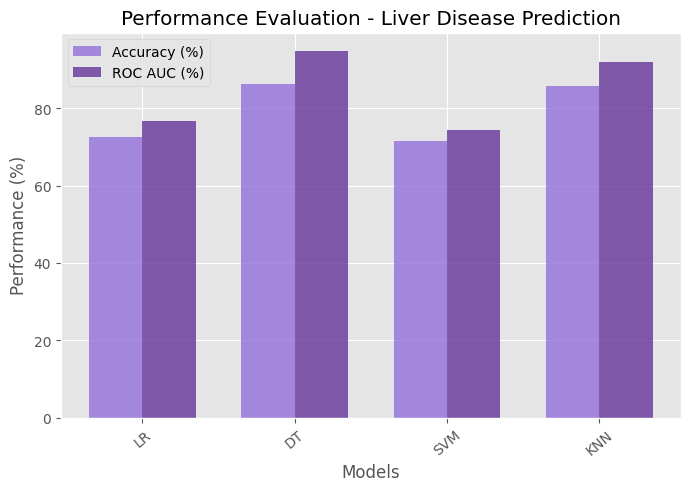

In [48]:
from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt

# Define models with labels
models = [
    {'label': 'LR', 'model': lr},
    {'label': 'DT', 'model': dtc},
    {'label': 'SVM', 'model': svc},
    {'label': 'KNN', 'model': knn}
]

# Initialize lists to store performance metrics
means_roc = []
means_accuracy = []

# Evaluate each model
for m in models:
    model = m['model']
    label = m['label']
    
    # Fit model and make predictions
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Calculate accuracy
    accuracy = metrics.accuracy_score(y_test, y_pred)
    mean_accuracy = 100 * round(accuracy, 4)
    means_accuracy.append(mean_accuracy)
    
    # Calculate ROC AUC
    if hasattr(model, 'predict_proba'):
        y_pred_prob = model.predict_proba(X_test)[:,1]
        mean_roc = 100 * round(metrics.roc_auc_score(y_test, y_pred_prob), 4)
    else:
        mean_roc = np.nan  # Use NaN if predict_proba is not available
    
    means_roc.append(mean_roc)
    
    # Display mean accuracy and mean ROC AUC for each model
    print(f"Model: {label}")
    print(f"Mean Accuracy: {mean_accuracy:.2f}%")
    print(f"Mean ROC AUC: {mean_roc:.2f}%")
    print("-" * 30)

# Convert lists to tuples for plotting
means_accuracy = tuple(means_accuracy)
means_roc = tuple(means_roc)

# Create plot
index = np.arange(len(models))
bar_width = 0.35

# Create a figure
fig, ax = plt.subplots(figsize=(8, 5))

# Plot accuracy and ROC AUC as bar charts
rects1 = plt.bar(index, means_accuracy, bar_width, alpha=0.8, color='mediumpurple', label='Accuracy (%)')
rects2 = plt.bar(index + bar_width, means_roc, bar_width, alpha=0.8, color='rebeccapurple', label='ROC AUC (%)')

# Set axis labels and title
ax.set_xlabel('Models')
ax.set_ylabel('Performance (%)')
ax.set_title('Performance Evaluation - Liver Disease Prediction')

# Set x-ticks and labels
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels([model['label'] for model in models], rotation=40, ha='center')

# Add legend
ax.legend()

# Show the plot
plt.show()


In [62]:

import pickle
model = dtc
filename = 'C:/Users/Dell/OneDrive/Desktop/DM PROJECT/liver_prediction.pkl'
pickle.dump(model, open(filename,'wb'))